In [2]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [3]:
stocks_2014 = pd.read_csv("stocks_2014.csv")
stocks_2015 = pd.read_csv("stocks_2015.csv")
stocks_2016 = pd.read_csv("stocks_2016.csv")

In [4]:
stocks_2014

,<ticker>,<date>,<open>,<high>,<low>,<close>,<vol>
0,A,2014-01-01,57.19,57.19,57.19,57.19,0
1,A,2014-01-02,57.10,57.10,56.15,56.21,1916100
2,A,2014-01-03,56.39,57.35,56.26,56.92,1866600
3,A,2014-01-06,57.40,57.70,56.56,56.64,1777400
4,A,2014-01-07,56.95,57.63,56.93,57.45,1463200
...,...,...,...,...,...,...,...
705708,ZX,2014-12-25,1.10,1.10,1.10,1.10,0
705709,ZX,2014-12-26,1.10,1.14,1.10,1.14,9000
705710,ZX,2014-12-29,1.15,1.15,1.08,1.10,24000
705711,ZX,2014-12-30,1.10,1.50,1.10,1.47,99100


In [5]:
stocks_2014 = stocks_2014.rename(columns={'<ticker>':"ticker", "<date>": "date", '<open>':"open",
                            '<high>': "high", '<low>': "low", '<close>':"close", '<vol>':"vol"})
stocks_2014 = stocks_2014[stocks_2014.vol != 0]
stocks_2014 = stocks_2014[stocks_2014.high != 0]

stocks_2014

,ticker,date,open,high,low,close,vol
1,A,2014-01-02,57.10,57.10,56.15,56.21,1916100
2,A,2014-01-03,56.39,57.35,56.26,56.92,1866600
3,A,2014-01-06,57.40,57.70,56.56,56.64,1777400
4,A,2014-01-07,56.95,57.63,56.93,57.45,1463200
5,A,2014-01-08,57.33,58.54,57.17,58.39,2659400
...,...,...,...,...,...,...,...
705707,ZX,2014-12-24,1.15,1.15,1.10,1.10,24500
705709,ZX,2014-12-26,1.10,1.14,1.10,1.14,9000
705710,ZX,2014-12-29,1.15,1.15,1.08,1.10,24000
705711,ZX,2014-12-30,1.10,1.50,1.10,1.47,99100


In [6]:
stocks_2015 = stocks_2015.rename(columns={'<ticker>':"ticker", "<date>": "date", '<open>':"open",
                            '<high>': "high", '<low>': "low", '<close>':"close", '<vol>':"vol"})

stocks_2015 = stocks_2015[stocks_2015.vol != 0]
stocks_2015 = stocks_2015[stocks_2015.high != 0]
stocks_2015

,ticker,date,open,high,low,close,vol
1,A,2015-01-02,41.18,41.31,40.37,40.56,1530700
2,A,2015-01-05,40.32,40.46,39.70,39.80,2042200
3,A,2015-01-06,39.81,40.02,39.02,39.18,2084500
4,A,2015-01-07,39.52,39.81,39.29,39.70,3359600
5,A,2015-01-08,40.24,40.98,40.18,40.89,2116300
...,...,...,...,...,...,...,...
760185,ZX,2015-12-24,0.84,0.86,0.84,0.86,400
760187,ZX,2015-12-28,0.84,0.87,0.81,0.87,8600
760188,ZX,2015-12-29,0.80,0.85,0.80,0.82,2900
760189,ZX,2015-12-30,0.80,0.84,0.76,0.84,2400


In [8]:
stocks_2016 = stocks_2016.rename(columns={'<ticker>':"ticker", "<date>": "date", '<open>':"open",
                            '<high>': "high", '<low>': "low", '<close>':"close", '<vol>':"vol"})
stocks_2016 = stocks_2016[stocks_2016.vol != 0]
stocks_2016 = stocks_2016[stocks_2016.high != 0]
stocks_2016[stocks_2016.ticker == "A"]

,ticker,date,open,high,low,close,vol
1,A,2016-01-04,41.06,41.19,40.34,40.69,3287300
2,A,2016-01-05,40.73,40.95,40.34,40.55,2587200
3,A,2016-01-06,40.24,40.99,40.05,40.73,2103600
4,A,2016-01-07,40.14,40.15,38.81,39.00,3504300
5,A,2016-01-08,39.22,39.71,38.47,38.59,3736700
...,...,...,...,...,...,...,...
256,A,2016-12-23,46.08,46.23,45.93,46.20,727600
258,A,2016-12-27,46.37,46.66,46.32,46.51,1535400
259,A,2016-12-28,46.51,46.70,45.68,45.72,1177200
260,A,2016-12-29,45.68,46.00,45.57,45.64,891300


In [534]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train = pd.get_dummies(pd.concat([stocks_2014, stocks_2015])[["open"]])
X_test = pd.get_dummies(stocks_2016[["open"]])
y_train = pd.concat([stocks_2014, stocks_2015])[["close"]]
y_test = stocks_2016[["close"]]

In [535]:
from sklearn.linear_model import LinearRegression as classi
classifier = classi()
classifier.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [536]:
from sklearn.metrics import mean_squared_error as mse
classifier.score(X_test, y_test)
print(f"accuracy: {classifier.score(X_test, y_test)}")
print(f"mean sq error: {mse(classifier.predict(X_test), y_test)}")

accuracy: 0.9999443082759941
mean sq error: 865.5432701095391


In [537]:
df1 = pd.DataFrame(classifier.predict(X_test))
df2 = y_test
df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
df = pd.concat([df1, df2], axis=1)
df = df.rename({0: "Predicted", "close": "Actual"}, axis=1)
df
classifier.coef_

array([[0.9992688]])

In [538]:
df["sq error"] = ((classifier.predict(X_test) - y_test) * (classifier.predict(X_test) - y_test))
df

,Predicted,Actual,sq error
0,41.060483,40.69,0.137257
1,40.730724,40.55,0.032661
2,40.241082,40.73,0.239041
3,40.141155,39.00,1.302235
4,39.221828,38.59,0.399207
...,...,...,...
764526,1.369526,1.39,0.000419
764527,1.409497,1.37,0.001560
764528,1.399504,1.22,0.032222
764529,1.189657,1.20,0.000107


<IPython.core.display.Javascript object>


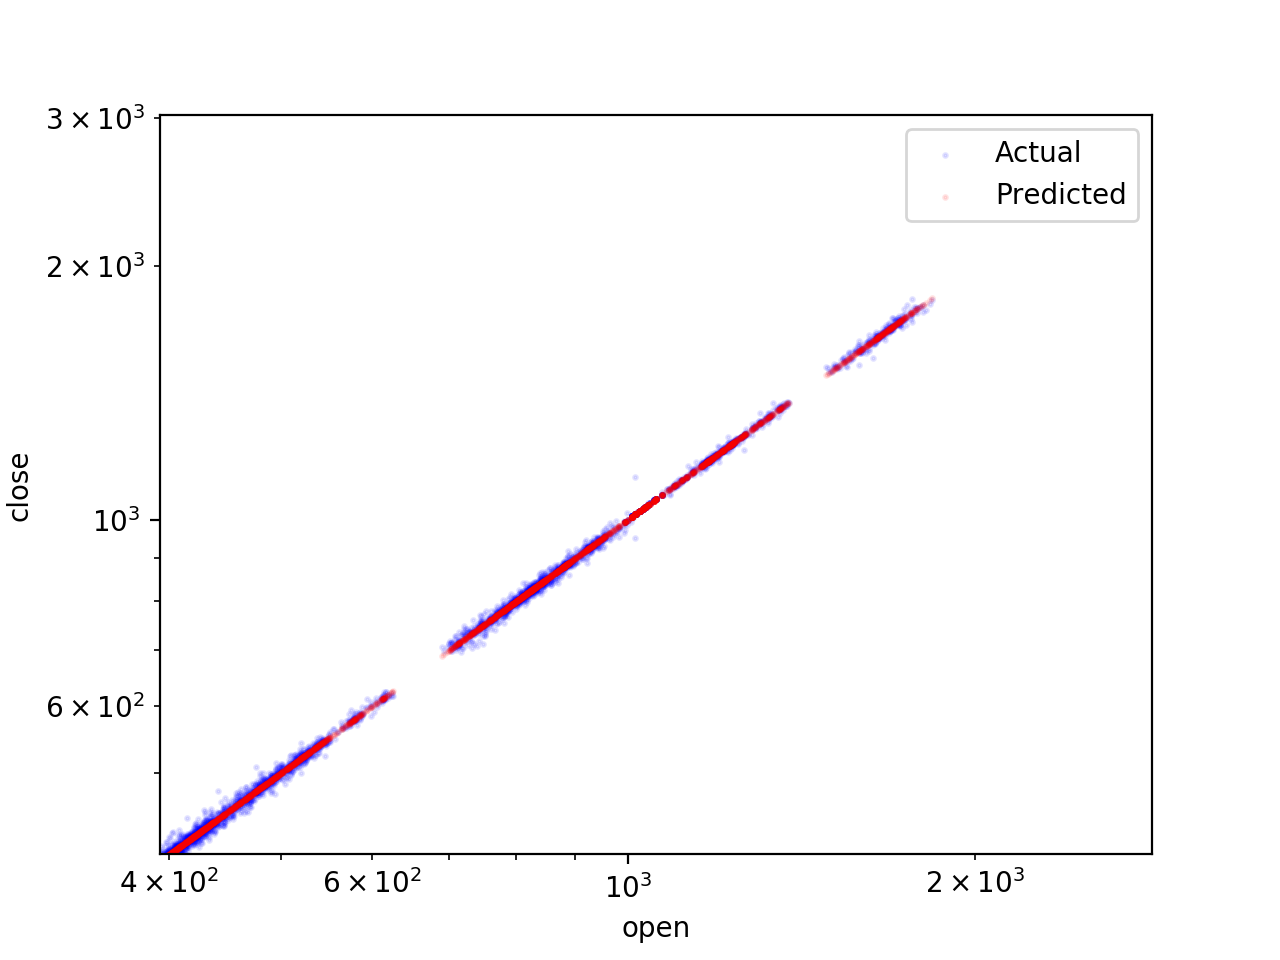

[]

In [542]:
plt.scatter(X_test["open"], df["Actual"], c="blue", s=2, alpha=0.1)
plt.scatter(X_test["open"], df["Predicted"], c="red", s=2, alpha=0.1)
plt.xlabel("open")
plt.ylabel("close")
plt.legend(["Actual", "Predicted"])
plt.loglog()

Predicted    0.981142
Actual       0.990000
sq error     0.160877
dtype: float64